<center> <h1>PRIMERA PREDICIÓN DEL SUEÑO DE UN PACIENTE</h1> </center>
<center> <h4>Noemi González, Roberto Holgado y Carmen Plaza seco</h4> </center>

[URL PHYSIONET](https://physionet.org/content/sleep-accel/1.0.0/)

En el estudio polisomnográfico se analiza el estado del sujeto y se extraen etiquetas que identifican las fases y calidad del sueño. Durante ese estudio se han estado recogiendo, a través de un dispositivo weareable, otras variables fisiológicas como la frecuencia cardiaca o el movimiento. Se pretende entrenar un modelo que relacione las etiquetas del sueño con las variables recogidas por el weareable.

A modo de futura aplicación, se podría incorporar dicho clasificador al dispositivo weareable de forma que analizara el sueño sin necesidad de someter al sujeto a un estudio polisomnográfico.

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.svm import SVC


In [3]:
#print(os.listdir("labels"))

In [4]:
lista_pacientes_sueño=[]
for file in (os.listdir("labels")):
    lista_pacientes_sueño.append(os.path.join("labels",file))
    lista_pacientes_sueño=sorted(lista_pacientes_sueño)
    
lista_pacientes_frecuencia_cardiaca=[]
for file in os.listdir("heart_rate"):
    lista_pacientes_frecuencia_cardiaca.append(os.path.join("heart_rate",file))

lista_pacientes_pasos=[]
for file in os.listdir("steps"):
    lista_pacientes_pasos.append(os.path.join("steps",file))

lista_pacientes_movimiento=[]
for file in os.listdir("motion"):
    lista_pacientes_movimiento.append(os.path.join("motion",file))

In [5]:
#print(len(lista_pacientes_sueño),len(lista_pacientes_frecuencia_cardiaca),len(lista_pacientes_pasos),len(lista_pacientes_movimiento))

**Seleccionar el número de paciente a estudiar**

In [6]:
n=2

In [7]:
#lista_pacientes_sueño[n]
#lista_pacientes_frecuencia_cardiaca[n]
#lista_pacientes_pasos[n]
#lista_pacientes_movimiento[n]

# PRIMER CLASIFICADOR 

Para enfrentar un problema complejo como es éste, se ha decido empezar a crear clasificadores más simples e ir añadiendo variables según avanzamos en el proyecto. De esta forma, podremos también comprobar si la adición de nuevas variables mejora en la predición del modelo o no.

Comenzamos visualizando la variable de salida correspondiente a un sujeto. Esta salida será la que se intentará predecir en base, en este ejemplo, a la frecuencia cardiaca del sujeto.

### 1. SUEÑO

In [8]:
paciente1_sueño=pd.read_csv(lista_pacientes_sueño[n], delimiter=' ')
paciente1_sueño.columns=["Tiempo","Fase_sueño"]
#paciente1_sueño

Text(0, 0.5, 'Fases del sueño')

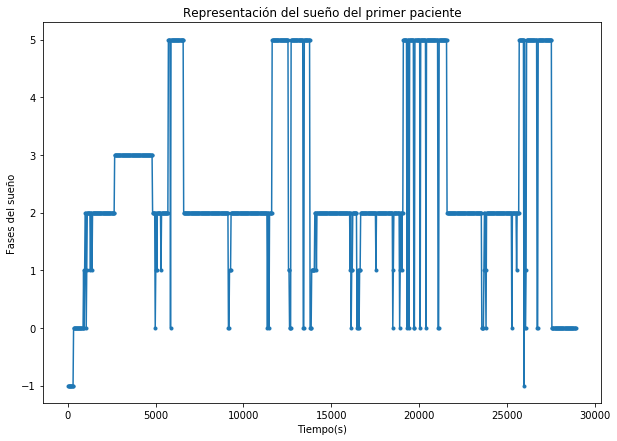

In [9]:
x=paciente1_sueño["Tiempo"]
y=paciente1_sueño["Fase_sueño"]
plt.figure(figsize=(10,7))
plt.plot(x,y, marker='.')
plt.title("Representación del sueño del primer paciente")
plt.xlabel("Tiempo(s)")
plt.ylabel("Fases del sueño")

A continuación representamos la variable que se utilizará para entrenar el modelo.

### 2. FRECUENCIA CARDIACA

In [10]:
paciente1_cardio=pd.read_csv(lista_pacientes_frecuencia_cardiaca[n])
paciente1_cardio.columns=["Tiempo","Frecuencia_cardio"]
#paciente1_cardio

Text(0, 0.5, 'Frecuencia cardiaca')

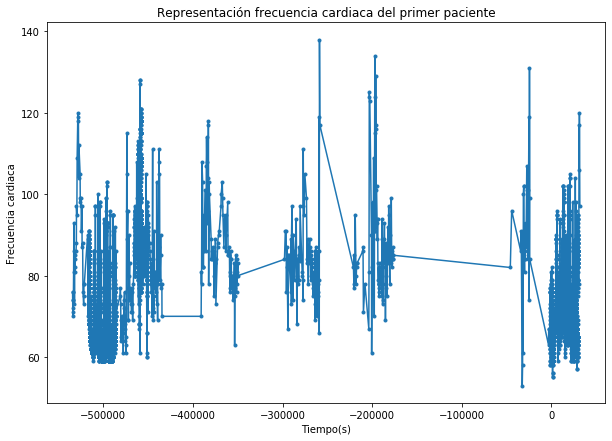

In [11]:
x=paciente1_cardio['Tiempo']
y=paciente1_cardio['Frecuencia_cardio']
plt.figure(figsize=(10,7))
plt.plot(x,y, marker='.')
plt.title("Representación frecuencia cardiaca del primer paciente")
plt.xlabel("Tiempo(s)")
plt.ylabel("Frecuencia cardiaca")

### CREACIÓN DEL MODELO

El primer boceto de modelo se construirá sobre un único paciente, y se testeará sobre un distinto paciente.

Una vez se haya conseguido esdte objetivo, se intentará, por ejemplo, entrenar el modelo con 15 matrices de 15 suejtos distintos y testearlo con 10 sujetos diferentes.

In [135]:
paciente1_sueño

,Tiempo,Fase_sueño
0,30,-1
1,60,-1
2,90,-1
3,120,-1
4,150,-1
...,...,...
959,28800,0
960,28830,0
961,28860,0
962,28890,0


In [136]:
paciente1_cardio

,Tiempo,Frecuencia_cardio
0,-534262.57249,76.0
1,-534053.57295,72.0
2,-533913.86532,76.0
3,-533909.86532,74.0
4,-533902.86532,74.0
...,...,...
12872,30395.74585,78.0
12873,30786.27459,117.0
12874,30986.27222,106.0
12875,31152.27139,120.0


Debemos transformar la frecuencia recogida por el weareable de forma que refleje esa frecuencia cardiaca en los tiempos que se corresponden a las etiquetas del sueño. Deben ser compatibles y tener la misma shape.

In [137]:
paciente1_cardio_class=paciente1_cardio[paciente1_cardio["Tiempo"]>0]

In [138]:
paciente1_cardio_class

,Tiempo,Frecuencia_cardio
7202,2.50048,77.0
7203,12.50048,77.0
7204,17.50048,77.0
7205,19.50048,77.0
7206,27.50048,77.0
...,...,...
12872,30395.74585,78.0
12873,30786.27459,117.0
12874,30986.27222,106.0
12875,31152.27139,120.0


En el estudio polisomnográfico se extrae una etiqueta del sueño cada 30 y en el dispositivo es difícil ver el patrón de intervalo de tiempo que sigue para captar la información; a simple vista, no parece que siga un determinado.

Aproximadamente, cada 5 tiempos recogidos en el weareable corresponde a 1 tiempo del estudio polisomnográfico. Por tanto se decide recoger la frecuencia cardiaca correspondiente a las etiquetas del sueño.

In [139]:
paciente1_cardio_class=paciente1_cardio_class.iloc[[i for i in range(0,len(paciente1_cardio_class),5)]]

In [145]:
paciente1_cardio_class_fin=paciente1_cardio_class.iloc[0:len(paciente1_sueño)]

In [146]:
#paciente1_cardio_class_fin['Tiempo_class']=paciente1_sueño['Tiempo']

In [150]:
paciente1_cardio_class_fin

,Tiempo,Frecuencia_cardio
7202,2.50048,77.0
7207,28.50048,77.0
7212,53.50048,68.0
7217,79.50048,68.0
7222,110.50048,68.0
...,...,...
11997,25036.70849,65.0
12002,25061.70849,64.0
12007,25086.70849,64.0
12012,25112.70849,64.0


Una vez diseñados los conjuntos con las mismas dimensiones, establecemos X_train,y_train. Problema: que no es exactamente lo frecucnia cardiaca en ese punto.

In [151]:
X_train=paciente1_cardio_class_fin
y_train=paciente1_sueño["Fase_sueño"]

In [152]:
len(X_train)

964

In [153]:
svclassifier = SVC(C=10**5,kernel='rbf',gamma=0.0001) #kernel gaussiano
svclassifier.fit(X_train, y_train) 
#y_pred_1 = svclassifier.predict(X_val)
#cm= confusion_matrix(y_val, y_pred_1)


SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Testeo del modelo con paciente diferente

In [154]:
n=5

In [155]:
paciente_sueño=pd.read_csv(lista_pacientes_sueño[n], delimiter=' ')
paciente_sueño.columns=["Tiempo","Fase_sueño"]

In [156]:
paciente_cardio=pd.read_csv(lista_pacientes_frecuencia_cardiaca[n])
paciente_cardio.columns=["Tiempo","Frecuencia_cardio"]

In [157]:
paciente_cardio_test=paciente_cardio[paciente_cardio["Tiempo"]>0]
paciente_cardio_test=paciente_cardio_test.iloc[[i for i in range(0,len(paciente_cardio_test),5)]]
paciente_cardio_test=paciente_cardio_test.iloc[0:len(paciente1_sueño)]

In [158]:
y_pred_1 = svclassifier.predict(paciente_cardio_test)

In [159]:
#y_pred_1

# Comparación Predición modelo vs Estudio Polisomnográfico (Realidad)


#### Estudio Polisomnográfico (Realidad)

Text(0, 0.5, 'Fases del sueño')

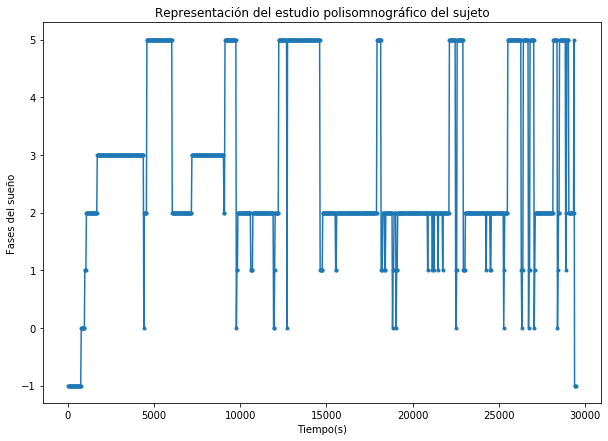

In [160]:
x=paciente_sueño["Tiempo"]
y=paciente_sueño["Fase_sueño"]
plt.figure(figsize=(10,7))
plt.plot(x,y, marker='.')
plt.title("Representación del estudio polisomnográfico del sujeto")
plt.xlabel("Tiempo(s)")
plt.ylabel("Fases del sueño")

Text(0, 0.5, 'Fases del sueño')

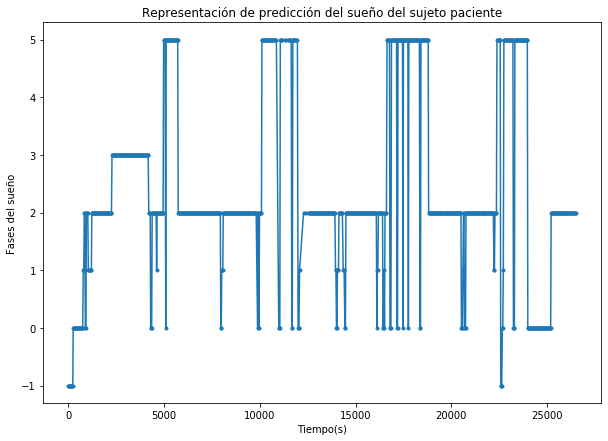

In [163]:
x=paciente_cardio_test["Tiempo"]
y=y_pred_1  #la prediccion
plt.figure(figsize=(10,7))
plt.plot(x,y, marker='.')
plt.title("Representación de predicción del sueño del sujeto paciente")
plt.xlabel("Tiempo(s)")
plt.ylabel("Fases del sueño")

# cosas deberes que me han quedado claro que hay que hacer

* PONER TODOS LOS PACIENTES EN UN MISMO RANGO , ES DECIR , TODO TIENE QUE TENER LAS MISMAS DIMENSIONES PARA PODER HACER UN CLASIFICADOR
* BUSCAR UN METODO DE EVALUACION NUMERICO PARA VER SI CLASIFICA BIEN
* SI CREAMOS EL MODELO CON UNA MATRIZ ENORME DE MUCHOS PACIENTES, LUEGO SE PUEDE PARA TESTEAR METER UN UVECTOR MAS PEQUEÑI???? CREO QUE NO PREGUNTAR
* HACER ESTO PERO PARA HACIENDO UN TRAIN DE X EJEMPLO 20 PACIENTES Y TESTEARLO CON UN UNICO PACIENTE.